# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [9]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./dataset/train.p"
validation_file="./dataset/valid.p"
testing_file = "./dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print(np.shape(y_train))
print(np.amax(y_train))


(34799,)
42


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [10]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.amax(y_train)+1 #zero-indexed

print("Number of training examples =", n_train)
print("Number of validation examples =",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

9
max of X_train: [255 255 255]
shape of mean: (3,)
X_train mean: [ 86.69812205  79.49594061  81.83870445]
X_train std: [ 69.28387882  66.26993615  67.76634548]


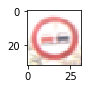

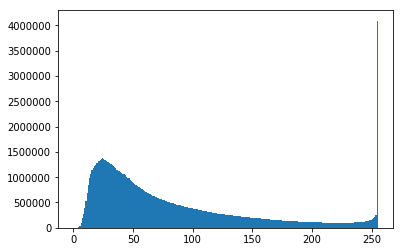

In [11]:
import random
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure(num=1,figsize=(1,1))
plt.imshow(image)
plt.imsave('./dataset/example.png',image)
print(y_train[index])

#plt.figure(num=2)
#class_historgam = plt.hist(y_train,bins=n_classes)

plt.figure(num=3)
pixel_histogram = plt.hist(X_train.flatten(),bins=255)
print("max of X_train:",np.amax(X_train,axis=(0,1,2)))
print("shape of mean:",np.mean(X_train,axis=(0,1,2)).shape)
print("X_train mean:",np.mean(X_train,axis=(0,1,2)))
#print("X_valid mean:",np.mean(X_valid,axis=(0,1,2)))
#print("X_test mean:",np.mean(X_test,axis=(0,1,2)))
print("X_train std:",np.std(X_train,axis=(0,1,2)))
#print("shape of X_train.flatten ", X_train.flatten().shape)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
### Helper function to normalize the data sets
def myNormal(x,mu,sigma):
    #return np.subtract(x.astype(float),np.std(x,axis=(0,1,2)))/np.mean(x,axis=(0,1,2))
    return np.array([((i-mu)/sigma) for i in x])

(34799, 32, 32, 3)
X_train_norm mean: [-0.32267092 -0.37893796 -0.36063512]
X_train_norm std: [ 0.5412803   0.51773388  0.52942457]
X_valid_norm mean: [-0.3179726  -0.37193509 -0.35173854]
X_test_norm mean: [-0.3287897  -0.38412156 -0.3617342 ]


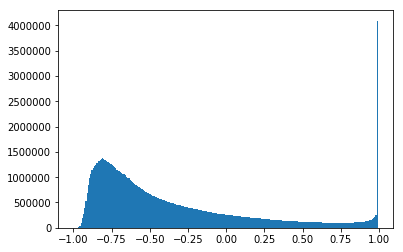

In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train_norm = myNormal(X_train,128.0,128.0)
print(X_train_norm.shape)
plt.figure(num=1)
pixel_histogram = plt.hist(X_train_norm.flatten(),bins=255)
print("X_train_norm mean:",np.mean(X_train_norm,axis=(0,1,2)))
print("X_train_norm std:",np.std(X_train_norm,axis=(0,1,2)))
X_valid_norm = myNormal(X_valid,128.0,128.0)
X_test_norm = myNormal(X_test,128.0,128.0)
print("X_valid_norm mean:",np.mean(X_valid_norm,axis=(0,1,2)))
print("X_test_norm mean:",np.mean(X_test_norm,axis=(0,1,2)))

### adding check to ensure image isn't distorted
#index = random.randint(0,len(X_train_norm))
#image = X_train_norm[index]
#image = (image*128.0+128).astype(int)
#print(image)
#orig_image = X_train[index]
#print(orig_image)
#plt.figure(num=1,figsize=(1,1))
#plt.imshow(image)
#plt.figure(num=2,figsize=(1,1))
#plt.imshow(orig_image)
#print(orig_image.shape)



### Model Architecture

In [17]:
from tensorflow.contrib.layers import flatten

def LeNet(x,dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    layer1_depth = 16
    layer2_depth = 32
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28xlayer1_depth.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, layer1_depth), mean = mu, stddev = sigma),name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(layer1_depth),name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28xlayer1_depth. Output = 14x14xlayer1_depth
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10xlayer2_depth
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, layer1_depth, layer2_depth), mean = mu, stddev = sigma),name='conv2_w')
    conv2_b = tf.Variable(tf.zeros(layer2_depth),name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5xlayer2_depth
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5xlayer2_depth. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma),name='fc1_w')
    fc1_b = tf.Variable(tf.zeros(120),name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma),name='fc2_w')
    fc2_b  = tf.Variable(tf.zeros(84),name='fc_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2,dropout)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma),name='fc3_w')
    fc3_b  = tf.Variable(tf.zeros(n_classes),name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [18]:
### Features and Labels
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 25
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None,32,32,3))
y = tf.placeholder(tf.int32,(None))
dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
### Training Pipeline
rate = 0.0007
logits = LeNet(x,dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
### Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
### Train the Model
x_train_set = X_train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train_set)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train_set, y_train = shuffle(x_train_set, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = x_train_set[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

In [19]:
### Test the model
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    num_examples = len(X_test)
    
    print("Testing...")
    print()
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

Testing...

Test Accuracy = 0.919



In [21]:
### Train set accuracy
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    num_examples = len(X_train_norm)
    
    print("Checking train accuracy...")
    print()
    train_accuracy = evaluate(X_train,y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

Checking train accuracy...

Train Accuracy = 0.993


In [23]:
### Validation set accuracy
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    num_examples = len(X_valid_norm)
    
    print("Checking train accuracy...")
    print()
    valid_accuracy = evaluate(X_valid,y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))

Checking train accuracy...

Valid Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [5]:
### Used to pre-process downloaded images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from skimage import exposure
i=1
raw_files = glob('./dataset/raw/german*.png')
for file in raw_files:
    img = Image.open(file)
    img.thumbnail((24,24),Image.ANTIALIAS)
    img.save('./dataset/new{0}.png'.format(i))
    i+=1
imgplot = plt.imshow(img)

[31 27 23  3 26]
x_new max: [ 1.  1.  1.]
x_new min: [ 0.  0.  0.]
x_new mean: [ 0.44265795  0.3458547   0.37762016]
x_new std: [ 0.29800943  0.26827034  0.26043111]


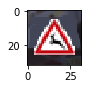

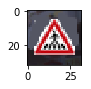

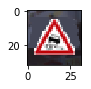

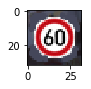

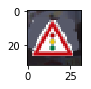

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from glob import glob
from skimage import exposure
x_new = []
files = glob('./dataset/*_32.png')
i=1
#print(files)
#for file in files:
    #img = Image.open('./dataset/german-road-signs-animals.png')
#    img = Image.open(file)
#    img.thumbnail((28,28),Image.ANTIALIAS)
#    img.save('./dataset/new{0}.png'.format(i))
#    i+=1
#imgplot = plt.imshow(img)
#print(imgplot)
for file in files:
    img = mpimg.imread(file)
    img = img[:,:,0:3]
    #img_eq = exposure.equalize_hist(img)
    #img = myNormal(img)
    x_new.append(img)
    
plt.figure(num=1,figsize=(1,1))
plt.imshow(x_new[0])

plt.figure(num=2,figsize=(1,1))
plt.imshow(x_new[1])

plt.figure(num=3,figsize=(1,1))
plt.imshow(x_new[2])

plt.figure(num=4,figsize=(1,1))
plt.imshow(x_new[3])

plt.figure(num=5,figsize=(1,1))
plt.imshow(x_new[4])

y_new = np.array([31,27,23,3,26])
print(y_new)
print("x_new max:",np.amax(x_new,axis=(0,1,2)))
print("x_new min:",np.amin(x_new,axis=(0,1,2)))
print("x_new mean:",np.mean(x_new,axis=(0,1,2)))
print("x_new std:",np.std(x_new,axis=(0,1,2)))

### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
x_new_norm = myNormal(x_new,0.5,0.5)
print("x_new_norm max:",np.amax(x_new_norm,axis=(0,1,2)))
print("x_new_norm min:",np.amin(x_new_norm,axis=(0,1,2)))
print("x_new_norm mean:",np.mean(x_new_norm,axis=(0,1,2)))
print("x_new_norm std:",np.std(x_new_norm,axis=(0,1,2)))
new_argmax = tf.argmax(logits,1)
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    num_examples = len(x_new_norm)
    
    print("Testing...")
    print()
    new_predictions = sess.run(new_argmax,feed_dict={x:x_new_norm, dropout: 1.0})
    print(new_predictions)

x_new_norm max: [ 1.  1.  1.]
x_new_norm min: [-1. -1. -1.]
x_new_norm mean: [-0.11468734 -0.30829316 -0.24476004]
x_new_norm std: [ 0.59601885  0.53654027  0.52086216]
Testing...

[5 5 8 5 5]


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_new_predictions = tf.equal(new_predictions,y_new)
accuracy_new = tf.reduce_mean(tf.cast(correct_new_predictions, tf.float32))
with tf.Session() as sess:
    accuracy = sess.run(accuracy_new)
    
print('Accuracy of new predictions: {:.3f}'.format(accuracy))

Accuracy of new predictions: 0.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
probs = tf.nn.softmax(logits)
top_5_op = tf.nn.top_k(probs,k=5)
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    top_5= sess.run(top_5_op,feed_dict={x:x_new_norm,dropout:1.0})

print(top_5)

TopKV2(values=array([[ 0.13336262,  0.10567582,  0.07187793,  0.06172246,  0.04323077],
       [ 0.13247465,  0.11435763,  0.05602672,  0.04793025,  0.04573858],
       [ 0.13529533,  0.08178877,  0.05118088,  0.051167  ,  0.0426994 ],
       [ 0.1528856 ,  0.13027611,  0.07165176,  0.06688263,  0.04147993],
       [ 0.11961   ,  0.07191161,  0.07060603,  0.05245186,  0.04413053]], dtype=float32), indices=array([[ 5,  8, 31,  7,  2],
       [ 5,  8,  7, 31,  2],
       [ 8,  5,  3,  2, 23],
       [ 5,  8,  3,  2,  7],
       [ 5,  7,  8, 31, 26]]))
